In [1]:
import numpy as np
import pandas as pd
from pandas import Series, DataFrame
import matplotlib.pyplot as plt

In [2]:
tipdf = pd.read_csv("../data/tips.csv")
tipdf

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2.0
1,10.34,1.66,Male,No,Sun,Dinner,3.0
2,21.01,3.50,Male,No,Sun,Dinner,3.0
3,23.68,3.31,Male,No,Sun,Dinner,2.0
4,24.59,3.61,Female,No,Sun,Dinner,4.0
...,...,...,...,...,...,...,...
240,27.18,2.00,Female,Yes,Sat,Dinner,2.0
241,22.67,2.00,Male,Yes,Sat,Dinner,2.0
242,17.82,1.75,Male,No,Sat,Dinner,2.0
243,18.78,3.00,Female,No,Thur,Dinner,2.0


In [3]:
tipdf.loc["2502020"] = np.nan
tipdf.tail(3)

,total_bill,tip,sex,smoker,day,time,size
243,18.78,3.0,Female,No,Thur,Dinner,2.0
244,25.34,NaN,NaN,NaN,NaN,NaN,NaN
2502020,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
#tipdf의 차원을 조회
tipdf.ndim
np.ndim(tipdf)

2

In [7]:
#tipdf의 크기 조회(행,열)
tipdf.shape
np.shape(tipdf)

(246, 7)

In [11]:
#tipdf의 데이타 조회
tipdf.head()
tipdf.tail()
tipdf.info()

tipdf.columns

<class 'pandas.core.frame.DataFrame'>
Index: 246 entries, 0 to 2502020
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   total_bill  245 non-null    float64
 1   tip         244 non-null    float64
 2   sex         244 non-null    object 
 3   smoker      244 non-null    object 
 4   day         244 non-null    object 
 5   time        244 non-null    object 
 6   size        244 non-null    float64
dtypes: float64(3), object(4)
memory usage: 15.4+ KB


Index(['total_bill', 'tip', 'sex', 'smoker', 'day', 'time', 'size'], dtype='object')

In [12]:
#가장 팁이 높은 데이타 상위 5개를 출력
tipdf.sort_values('tip', ascending=False).head()

,total_bill,tip,sex,smoker,day,time,size
170,50.81,10.00,Male,Yes,Sat,Dinner,3.0
212,48.33,9.00,Male,No,Sat,Dinner,4.0
23,39.42,7.58,Male,No,Sat,Dinner,4.0
59,48.27,6.73,Male,No,Sat,Dinner,4.0
141,34.30,6.70,Male,No,Thur,Lunch,6.0


In [14]:
def get_tippct(df):
    return round(df['tip']/df['total_bill'] * 100, 1)

In [19]:
#1.  tip_pct를 구하자.... tip_pct를 tipdf에 새로운 컬럼으로 추가
#2. get_tipct함수로 구한 값을 컬럼의 값으로 지정

tipdf["tip_pct"] = get_tippct(tipdf)
tipdf

,total_bill,tip,sex,smoker,day,time,size,tip_pct
0,16.99,1.01,Female,No,Sun,Dinner,2.0,5.9
1,10.34,1.66,Male,No,Sun,Dinner,3.0,16.1
2,21.01,3.50,Male,No,Sun,Dinner,3.0,16.7
3,23.68,3.31,Male,No,Sun,Dinner,2.0,14.0
4,24.59,3.61,Female,No,Sun,Dinner,4.0,14.7
...,...,...,...,...,...,...,...,...
241,22.67,2.00,Male,Yes,Sat,Dinner,2.0,8.8
242,17.82,1.75,Male,No,Sat,Dinner,2.0,9.8
243,18.78,3.00,Female,No,Thur,Dinner,2.0,16.0
244,25.34,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [21]:
tipdf.sort_values(['total_bill', 'tip_pct'],ascending=False).head()

,total_bill,tip,sex,smoker,day,time,size,tip_pct
170,50.81,10.00,Male,Yes,Sat,Dinner,3.0,19.7
212,48.33,9.00,Male,No,Sat,Dinner,4.0,18.6
59,48.27,6.73,Male,No,Sat,Dinner,4.0,13.9
156,48.17,5.00,Male,No,Sun,Dinner,6.0,10.4
182,45.35,3.50,Male,Yes,Sun,Dinner,3.0,7.7


In [23]:
tipdf.sort_values(['total_bill', 'tip_pct'],ascending=[False,False]).head()

,total_bill,tip,sex,smoker,day,time,size,tip_pct
170,50.81,10.00,Male,Yes,Sat,Dinner,3.0,19.7
212,48.33,9.00,Male,No,Sat,Dinner,4.0,18.6
59,48.27,6.73,Male,No,Sat,Dinner,4.0,13.9
156,48.17,5.00,Male,No,Sun,Dinner,6.0,10.4
182,45.35,3.50,Male,Yes,Sun,Dinner,3.0,7.7


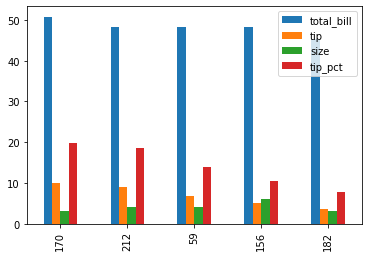

In [25]:
tipdf.sort_values(['total_bill', 'tip_pct'], ascending=[False,False]).head().plot(kind='bar')
plt.show()

In [29]:
# Male정보를 따로 분리해서 tipdf_man이라는 데이타프레임
tipdf_man = tipdf[tipdf['sex']=='Male']
tipdf_man.shape
tipdf_man

,total_bill,tip,sex,smoker,day,time,size,tip_pct
1,10.34,1.66,Male,No,Sun,Dinner,3.0,16.1
2,21.01,3.50,Male,No,Sun,Dinner,3.0,16.7
3,23.68,3.31,Male,No,Sun,Dinner,2.0,14.0
5,25.29,4.71,Male,No,Sun,Dinner,4.0,18.6
6,8.77,2.00,Male,No,Sun,Dinner,2.0,22.8
...,...,...,...,...,...,...,...,...
236,12.60,1.00,Male,Yes,Sat,Dinner,2.0,7.9
237,32.83,1.17,Male,Yes,Sat,Dinner,2.0,3.6
239,29.03,5.92,Male,No,Sat,Dinner,3.0,20.4
241,22.67,2.00,Male,Yes,Sat,Dinner,2.0,8.8


In [33]:
#Female정보를 따로 분리해서 tipdf_woman이라는 데이타프레임
tipdf['sex'].unique()
# tipdf_woman = tipdf[tipdf['sex'].isin('Female')]    #[]리스트형태로만 가능하다.
tipdf_woman = tipdf[tipdf['sex'].isin(['Female'])]
tipdf_woman

# tipdf_woman = tipdf[tipdf['sex']=='Female']
# tipdf_woman.shape
# tipdf_woman

,total_bill,tip,sex,smoker,day,time,size,tip_pct
0,16.99,1.01,Female,No,Sun,Dinner,2.0,5.9
4,24.59,3.61,Female,No,Sun,Dinner,4.0,14.7
11,35.26,5.00,Female,No,Sun,Dinner,4.0,14.2
14,14.83,3.02,Female,No,Sun,Dinner,2.0,20.4
16,10.33,1.67,Female,No,Sun,Dinner,3.0,16.2
...,...,...,...,...,...,...,...,...
226,10.09,2.00,Female,Yes,Fri,Lunch,2.0,19.8
229,22.12,2.88,Female,Yes,Sat,Dinner,2.0,13.0
238,35.83,4.67,Female,No,Sat,Dinner,3.0,13.0
240,27.18,2.00,Female,Yes,Sat,Dinner,2.0,7.4


In [34]:
tipdf_man.head(10)
tipdf_woman.head(10)

,total_bill,tip,sex,smoker,day,time,size,tip_pct
0,16.99,1.01,Female,No,Sun,Dinner,2.0,5.9
4,24.59,3.61,Female,No,Sun,Dinner,4.0,14.7
11,35.26,5.00,Female,No,Sun,Dinner,4.0,14.2
14,14.83,3.02,Female,No,Sun,Dinner,2.0,20.4
16,10.33,1.67,Female,No,Sun,Dinner,3.0,16.2
18,16.97,3.50,Female,No,Sun,Dinner,3.0,20.6
21,20.29,2.75,Female,No,Sat,Dinner,2.0,13.6
22,15.77,2.23,Female,No,Sat,Dinner,2.0,14.1
29,19.65,3.00,Female,No,Sat,Dinner,2.0,15.3
32,15.06,3.00,Female,No,Sat,Dinner,2.0,19.9


In [38]:
# tipdf_man tipdf_woman 두개의 데이타프레임을 병합해서
# tip_all 이라는 데이타프레임을 생성
tip_all = pd.concat([tipdf_man,tipdf_woman])
tip_all

,total_bill,tip,sex,smoker,day,time,size,tip_pct
1,10.34,1.66,Male,No,Sun,Dinner,3.0,16.1
2,21.01,3.50,Male,No,Sun,Dinner,3.0,16.7
3,23.68,3.31,Male,No,Sun,Dinner,2.0,14.0
5,25.29,4.71,Male,No,Sun,Dinner,4.0,18.6
6,8.77,2.00,Male,No,Sun,Dinner,2.0,22.8
...,...,...,...,...,...,...,...,...
226,10.09,2.00,Female,Yes,Fri,Lunch,2.0,19.8
229,22.12,2.88,Female,Yes,Sat,Dinner,2.0,13.0
238,35.83,4.67,Female,No,Sat,Dinner,3.0,13.0
240,27.18,2.00,Female,Yes,Sat,Dinner,2.0,7.4


In [41]:
tip_all = pd.concat([tipdf_man,tipdf_woman], keys=['Male','Female'])
tip_all

total_bill   tip     sex smoker   day    time  size  tip_pct
Male   1         10.34  1.66    Male     No   Sun  Dinner   3.0     16.1
       2         21.01  3.50    Male     No   Sun  Dinner   3.0     16.7
       3         23.68  3.31    Male     No   Sun  Dinner   2.0     14.0
       5         25.29  4.71    Male     No   Sun  Dinner   4.0     18.6
       6          8.77  2.00    Male     No   Sun  Dinner   2.0     22.8
...                ...   ...     ...    ...   ...     ...   ...      ...
Female 226       10.09  2.00  Female    Yes   Fri   Lunch   2.0     19.8
       229       22.12  2.88  Female    Yes   Sat  Dinner   2.0     13.0
       238       35.83  4.67  Female     No   Sat  Dinner   3.0     13.0
       240       27.18  2.00  Female    Yes   Sat  Dinner   2.0      7.4
       243       18.78  3.00  Female     No  Thur  Dinner   2.0     16.0

[244 rows x 8 columns]

In [42]:
tip_all.loc['2020'] = np.nan
tip_all.tail()

,total_bill,tip,sex,smoker,day,time,size,tip_pct
"(Female, 229)",22.12,2.88,Female,Yes,Sat,Dinner,2.0,13.0
"(Female, 238)",35.83,4.67,Female,No,Sat,Dinner,3.0,13.0
"(Female, 240)",27.18,2.00,Female,Yes,Sat,Dinner,2.0,7.4
"(Female, 243)",18.78,3.00,Female,No,Thur,Dinner,2.0,16.0
2020,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [48]:
#row별 na값의 갯수   row가 행 column이 열
tip_all.isnull().sum(axis=1)
tip_all.isna().sum(axis=1)

(Male, 1)        0
(Male, 2)        0
(Male, 3)        0
(Male, 5)        0
(Male, 6)        0
                ..
(Female, 229)    0
(Female, 238)    0
(Female, 240)    0
(Female, 243)    0
2020             8
Length: 245, dtype: int64

In [51]:
tip_all.dropna(how='any', inplace=True)
tip_all

,total_bill,tip,sex,smoker,day,time,size,tip_pct
"(Male, 1)",10.34,1.66,Male,No,Sun,Dinner,3.0,16.1
"(Male, 2)",21.01,3.50,Male,No,Sun,Dinner,3.0,16.7
"(Male, 3)",23.68,3.31,Male,No,Sun,Dinner,2.0,14.0
"(Male, 5)",25.29,4.71,Male,No,Sun,Dinner,4.0,18.6
"(Male, 6)",8.77,2.00,Male,No,Sun,Dinner,2.0,22.8
...,...,...,...,...,...,...,...,...
"(Female, 226)",10.09,2.00,Female,Yes,Fri,Lunch,2.0,19.8
"(Female, 229)",22.12,2.88,Female,Yes,Sat,Dinner,2.0,13.0
"(Female, 238)",35.83,4.67,Female,No,Sat,Dinner,3.0,13.0
"(Female, 240)",27.18,2.00,Female,Yes,Sat,Dinner,2.0,7.4


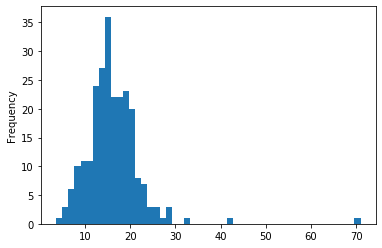

In [53]:
# 팁얼마가 젤 많은지 볼수있음 (팁의 분포를 볼 수 있음)
tipdf['tip_pct'].plot(kind='hist', bins=50)
plt.show()